# Exploratroy Data Analysis


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Import Data

In [2]:
raw_df=pd.read_csv('https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv')
df=raw_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8573 entries, 0 to 8572
Data columns (total 9 columns):
holiday                8573 non-null object
temp                   8573 non-null float64
rain_1h                8573 non-null float64
snow_1h                8573 non-null int64
clouds_all             8573 non-null int64
weather_main           8573 non-null object
weather_description    8573 non-null object
date_time              8573 non-null object
traffic_volume         8573 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 602.9+ KB


### Insights:
Data appears rather clean with no missing values on first glance

In [3]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,8573,8573.000000,8573.000000,8573.0,8573.000000,8573,8573,8573,8573.000000
unique,11,NaN,NaN,NaN,NaN,10,33,7294,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,8563,NaN,NaN,NaN,NaN,3136,1494,6,NaN
mean,NaN,278.976352,0.161284,0.0,52.560947,NaN,NaN,NaN,3286.762160
std,NaN,13.322459,1.439626,0.0,37.470062,NaN,NaN,NaN,2028.322769
min,NaN,244.820000,0.000000,0.0,0.000000,NaN,NaN,NaN,164.000000
25%,NaN,269.460000,0.000000,0.0,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,277.330000,0.000000,0.0,64.000000,NaN,NaN,NaN,3344.000000
75%,NaN,290.400000,0.000000,0.0,90.000000,NaN,NaN,NaN,5001.000000


### Understand the target variable, traffic volume

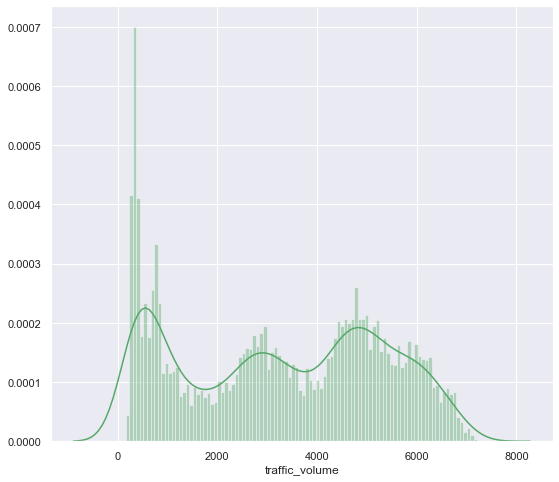

In [4]:
# examin the distribution of dependent variable
series_dep=df['traffic_volume']
plt.figure(figsize=(9, 8))
sns.distplot(df['traffic_volume'], color='g', bins=100, hist_kws={'alpha': 0.4});


### Insights:
Distrubtion of traffic volume is multimodal with three peaks.
Suggest more than one normal distribution
From literature, bimodal distribution of traffic volume is common as traffic flow tends to peak in the morning and evening

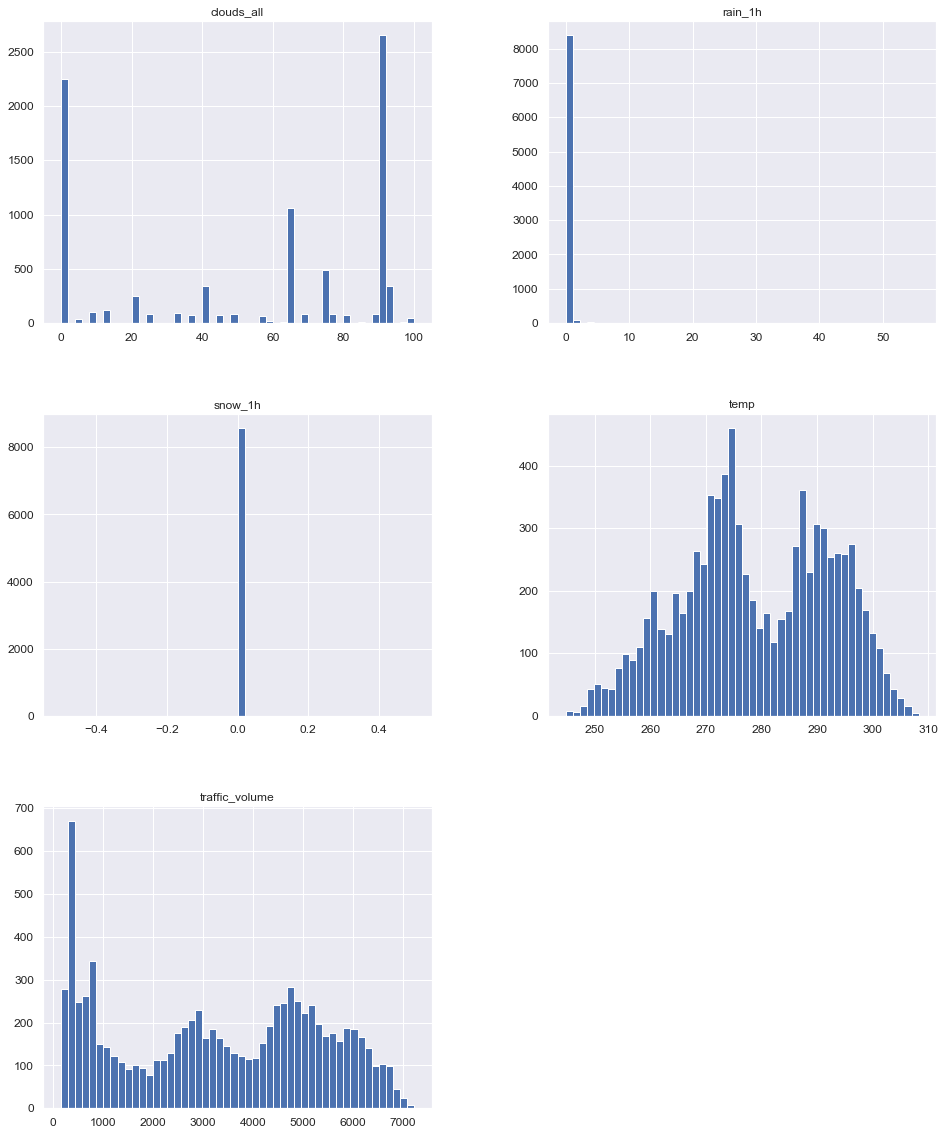

In [5]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=12, ylabelsize=12); 

### Insight:
snow_1h is not a useful feature as all obervations are zero. 
most values for rain_1h is zero.
we can drop snow_1h in modeling

In [6]:
df=df.drop('snow_1h',axis=1)
df.head()

,holiday,temp,rain_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


# Time Series Analysis
After looking up on the literature on time-series, mean and standard deviation(volatility) may change over time.
We are recommended to 'remove' the time effect on our dependent variable, traffic volume.

Traditional statistical methods are difficult to be applied on non-statinary data.

When a time series is stationary, it can be easier to model. Often, statistical modeling methods assume or require the time series to be stationary.

To make time series stationary, we need to remove:
1.Trend
2.Seasonality

Time-series is stationary when mean, standard deviation and autocorrelation are constant over time


In [7]:
# Make date_time the index
df['date_time'] = pd.to_datetime(df['date_time'],infer_datetime_format=True)
df.set_index('date_time', inplace=True)

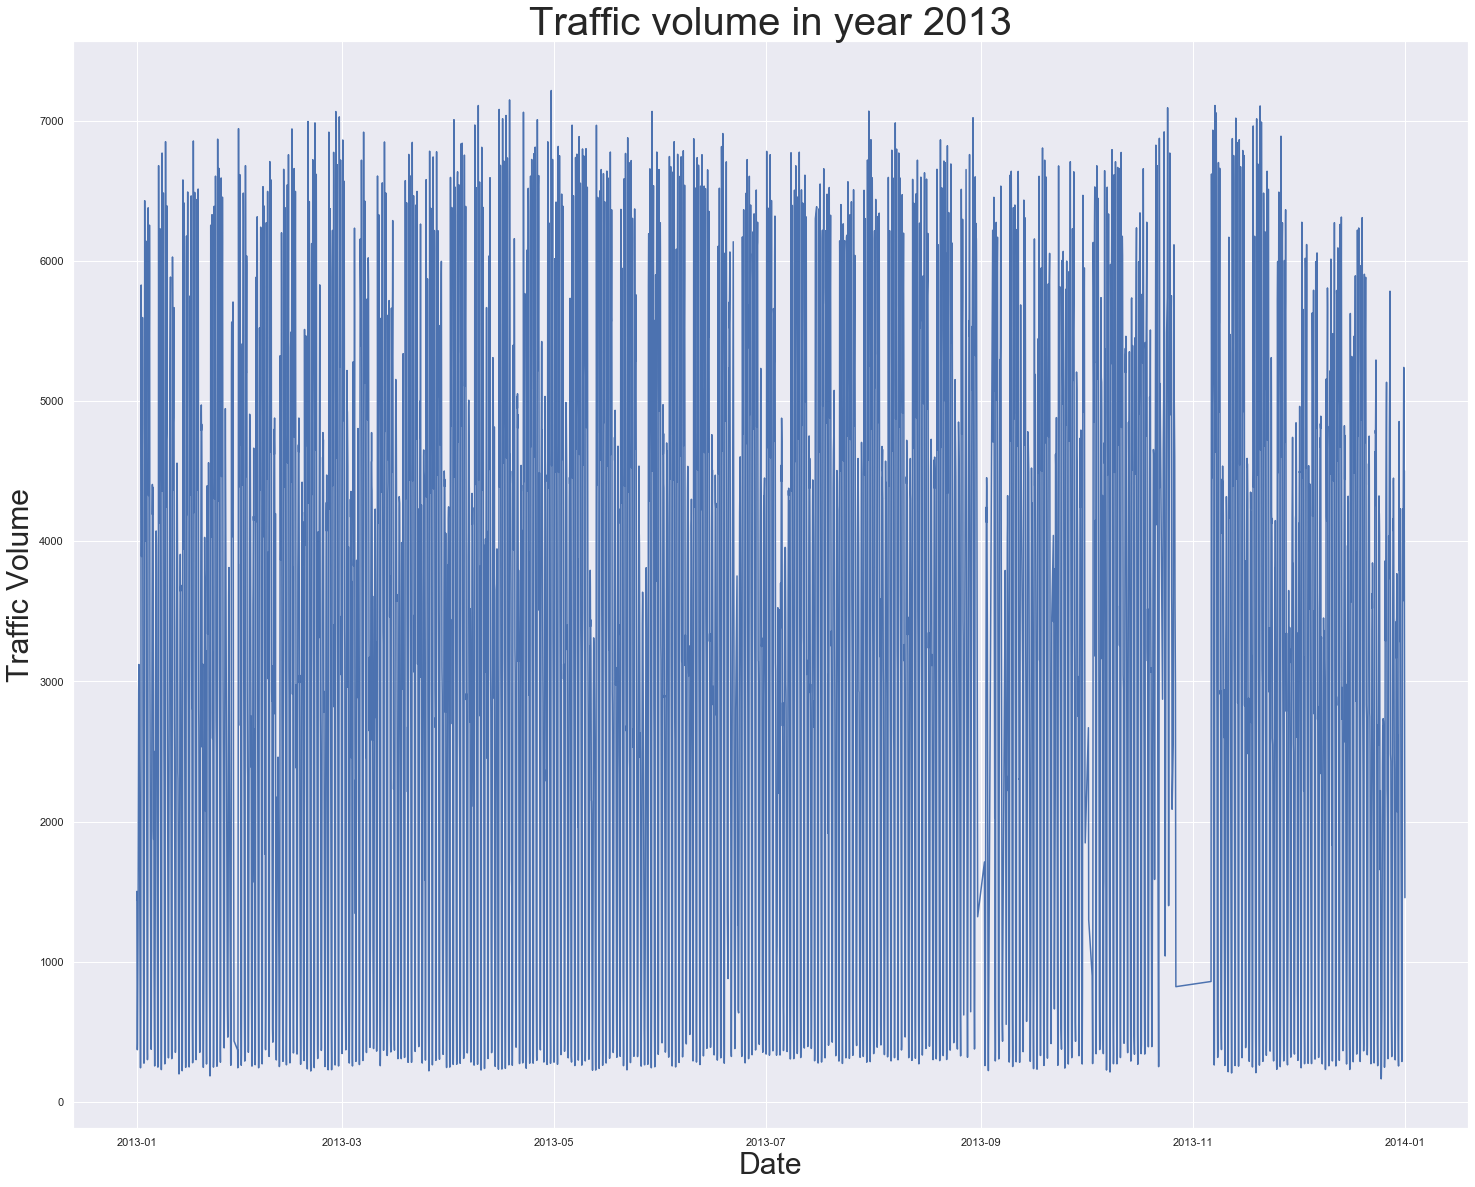

In [8]:


plt.figure(figsize=(25,20))
plt.plot(df['traffic_volume'])

plt.xlabel('Date',fontsize=30)
plt.ylabel('Traffic Volume',fontsize=30)
plt.title('Traffic volume in year 2013',fontsize=40)


plt.grid(True)

plt.show()

#month of sepetember and november seem to be different from the other months
# from November to December there seems to be a drop in the traffic volume


### Insights:
From November to December there seems to be a drop in the traffic volume
Month of Sepetember and November seem to be different from the other months
There might be some missing values which lead to interpolation of the graph
The missing values in November are quite significant.
For modelling, we will try to avoid using the month of November

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df['2013-10'],df['2013-11'])


                          holiday     temp  rain_1h  clouds_all  weather_main  \
date_time                                                                       
2013-10-01 21:00:00          None  285.520     0.00           0         Clear   
2013-10-01 23:00:00          None  282.930     0.00           0         Clear   
2013-10-02 23:00:00          None  286.630     2.37          88          Rain   
2013-10-02 23:00:00          None  286.630     2.37          88  Thunderstorm   
2013-10-02 23:00:00          None  286.630     2.37          88          Mist   
2013-10-03 02:00:00          None  286.630     0.00          92          Rain   
2013-10-03 03:00:00          None  286.460     0.00          92          Rain   
2013-10-03 05:00:00          None  286.120     0.00          92          Rain   
2013-10-03 05:00:00          None  286.120     0.00          92          Mist   
2013-10-03 06:00:00          None  286.340     0.00          92          Rain   
2013-10-03 08:00:00         

### Insights:
Data is missing between 27-10-2013 and 6-11-2013

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df['2013-08'],df['2013-09'])

                        holiday    temp  rain_1h  clouds_all  weather_main  \
date_time                                                                    
2013-08-01 00:00:00        None  290.40     0.00          48          Mist   
2013-08-01 00:00:00        None  290.40     0.00          48           Fog   
2013-08-01 01:00:00        None  289.31     0.00          48          Mist   
2013-08-01 02:00:00        None  289.12     0.00          48          Mist   
2013-08-01 02:00:00        None  289.12     0.00          48           Fog   
2013-08-01 03:00:00        None  289.31     0.00           0          Mist   
2013-08-01 04:00:00        None  289.37     0.00           0          Mist   
2013-08-01 04:00:00        None  289.37     0.00           0           Fog   
2013-08-01 05:00:00        None  289.58     0.00           0          Mist   
2013-08-01 05:00:00        None  289.58     0.00           0           Fog   
2013-08-01 06:00:00        None  289.81     0.25          24    

### Insights:
Only 1 reading was taken for 31-8-2013 and 1-9-2013 respectively.

## Trimming Data to exclude missing data

To simplify the model 
To capture the essence (the patterns, dependencies and trends in the model) 
To preserve the time-series correlation within the data Approach: 
Choose the range of data with minimum anomalies
We can't remove the data point
I have tried modelling the missing values with rolling mean but I believe this may lead to inaccurate model
To better understand the yearly traffic volume, we may want to compare with data from other years


In [11]:
#Data selected for modelling
df_selected=df[:'2013-10-26']
# df[:'2013-10-26'].head(),df[:'2013-10-26'].tail()

# Feature selection

Examine the effect of featues on traffic volume after removing the time effect on traffic volume i.e. understand the effect of other variables on a stationary time series of traffic volume

The time series of traffic volume can be decomposed into :
1) Trend
2) Autocorrelation with previous time steps and seasonal patterns
3) Residual
4) white noise

We are interested in the Residual component.
The pattern presents in the Residual may be explained by the effect of the other independent variables such as the weather conditions and holiday seasons


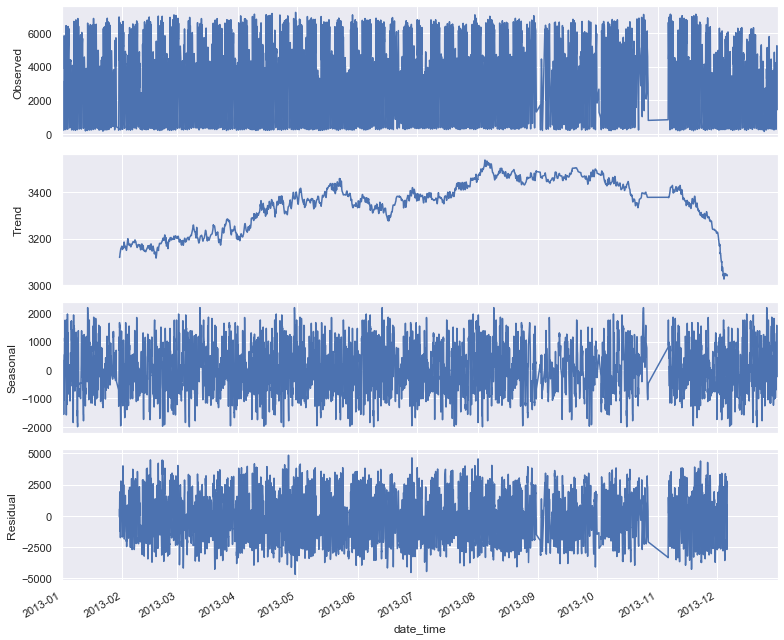

In [12]:
# I have tried using rolling mean and differencing methods to remove the trend and seaonality in the data set
# But to make the presentation clearer, we can use the built-in function is statsmodels

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
import statsmodels.api as sm
df_traffic=df['traffic_volume']

decomposition=sm.tsa.seasonal_decompose(df_traffic, model='additive',freq=24*7*4*2)
decomposition.plot()

plt.show()


# decomposition is an object with seasonal, trend, and resid as attributes.


### Insights:
The overall trend of traffic volume increases from January till September and decreases towards December.

The Seasonal components seems cyclical within a short interval as data was taken hourly.

The traffic volume follows a pattern daily and hence leads to high frequency in the seasonal component

Let's take a closer look at the Residual component for feature selection.

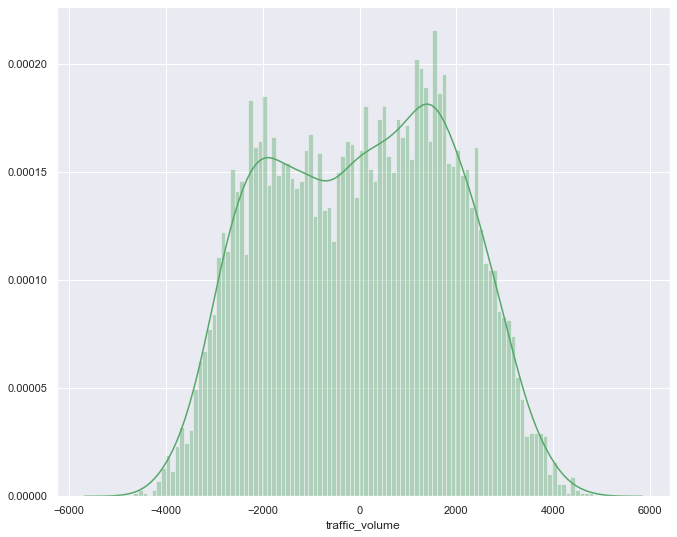

In [13]:
# Traffic volume distribution after removing trend and seasonal pattern

traffic_stationary=decomposition.resid.copy()
traffic_stationary=traffic_stationary.dropna()


sns.distplot(traffic_stationary, color='g', bins=100, hist_kws={'alpha': 0.4});

### Insights:
Resembles a normal distribution
Two peaks suggests bimodal distribution of traffic volume which is inline with literature i.e. morning and evening peaks

# Selecting features for modelling

Using the features identified in EDA, we can reduce the dimensionality of the problem to generate a relatively simple yet powerful model which 
This may also prevents overfitting of our model

In [14]:
#Choose the data within the range of the residual component
# as some of the data are trancated during decomposition i.e. calculating the rolling mean

traffic_resid=decomposition.resid.dropna()

start_date=traffic_resid.index[0]
#'2013-01-30 12:00:00'

end_date=traffic_resid.index[-1]
#'2013-12-06 08:00:00'

data=df.loc[start_date:end_date]

data_dummies=pd.get_dummies(data,drop_first=True)

X=data_dummies.drop(['traffic_volume'],axis=1)
y=traffic_resid
features=X.columns.values


In [15]:
#Scale the features for fair comparision 
from sklearn.preprocessing import StandardScaler
X.describe()

sc = StandardScaler()
X= sc.fit_transform(X)
y=y.values


<function matplotlib.pyplot.show(*args, **kw)>

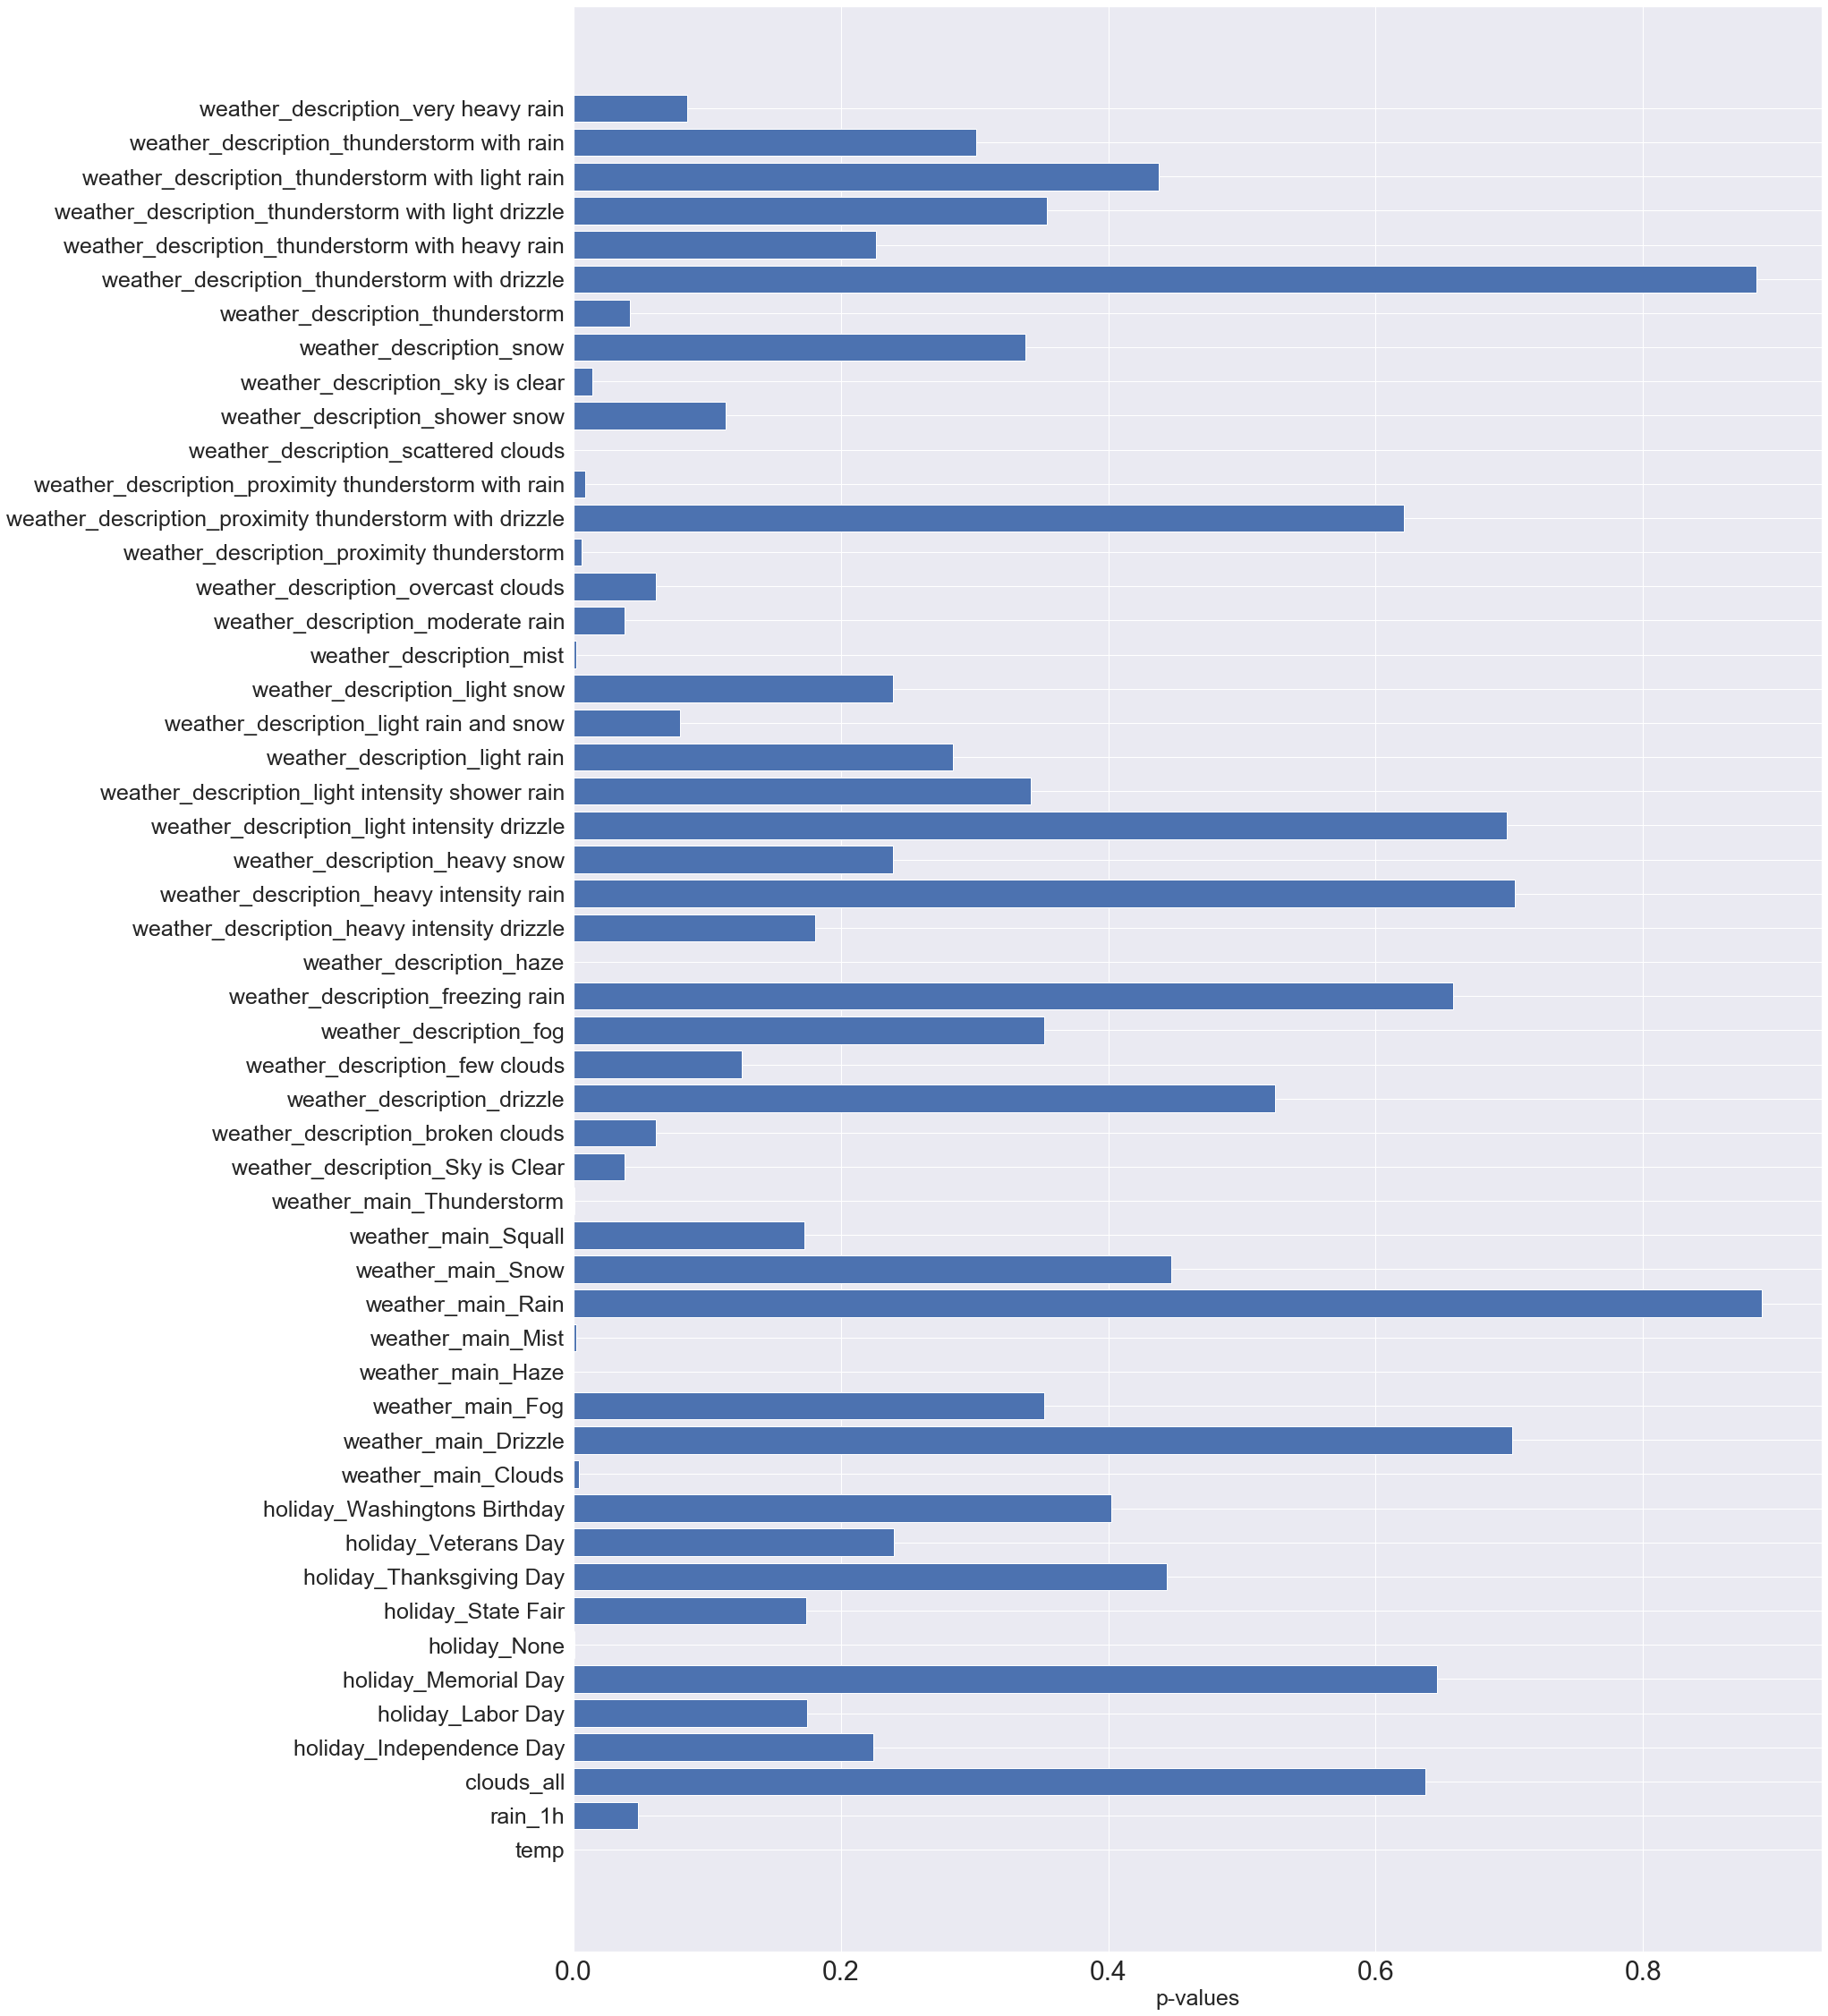

In [16]:
# using f-regression form sklearn package for feature selection
from sklearn.feature_selection import f_regression
f_regression(X,y.ravel())
p_values = f_regression(X,y.ravel())[1]
scores=p_values.round(3)

plt.figure(figsize=(25,40))
plt.tick_params(labelsize = 30)
y_pos=np.arange(len(features))
plt.barh(y_pos,scores)
plt.yticks(y_pos,features,fontsize=25)
plt.xlabel('p-values',fontsize=25)
plt.show


In [17]:
df_pval=pd.DataFrame({'features':features,'p-value':scores})
df_pval

,features,p-value
0,temp,0.000
1,rain_1h,0.048
2,clouds_all,0.637
3,holiday_Independence Day,0.224
4,holiday_Labor Day,0.175
5,holiday_Memorial Day,0.646
6,holiday_None,0.001
7,holiday_State Fair,0.174
8,holiday_Thanksgiving Day,0.444
9,holiday_Veterans Day,0.240


In [18]:
keyFeatures=df_pval['p-value']<0.001
df_keyFeatures=df_pval[keyFeatures]
keys=df_keyFeatures['features'].values

In [19]:
df_selected=pd.get_dummies(df_selected,drop_first=True)

In [20]:
df_processed=df_selected[['temp', 'weather_main_Haze', 'weather_description_haze','weather_description_scattered clouds','traffic_volume']]
df_processed.to_csv('data_cleaned.csv')


### Monthly traffic flow

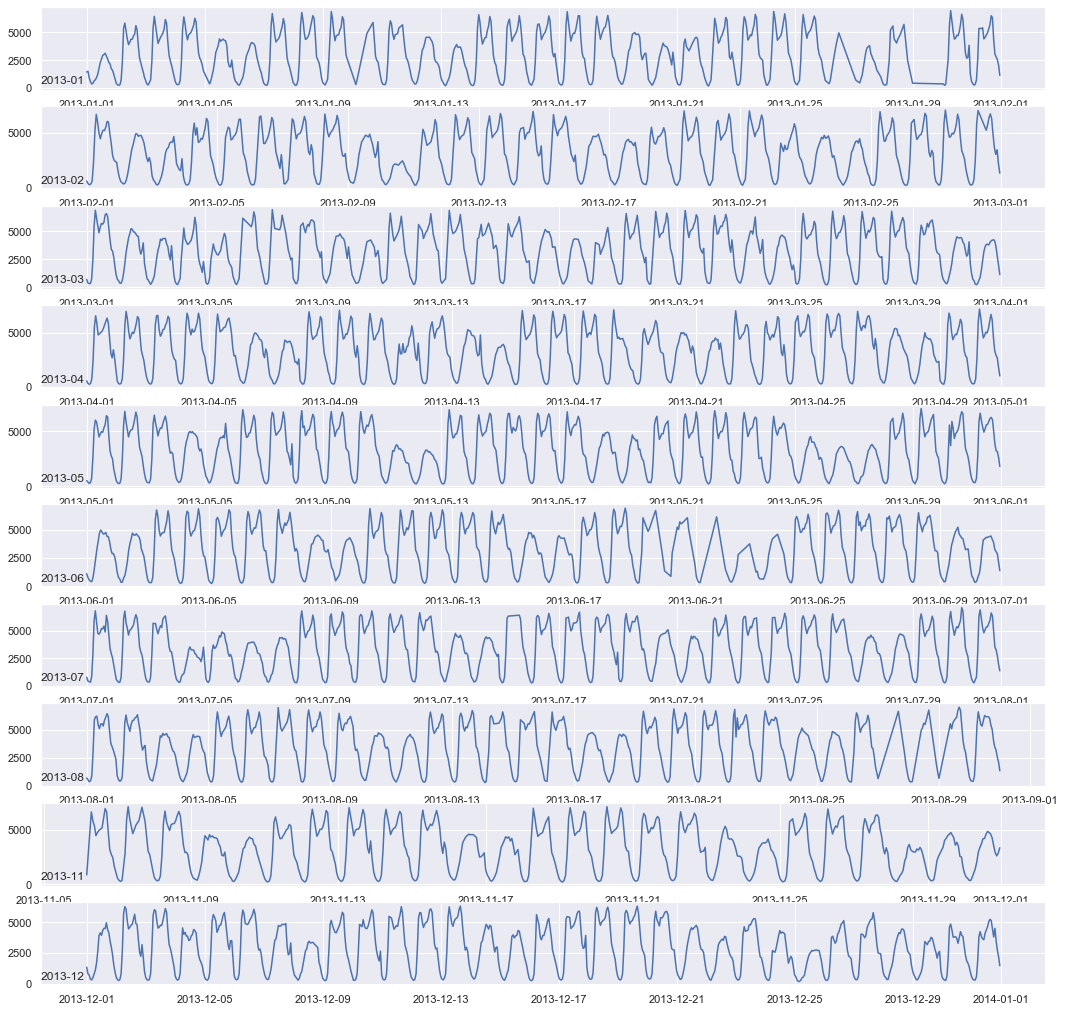

In [21]:
# Monthly traffic volume 
months = ['2013-01', '2013-02', '2013-03', '2013-04','2013-05','2013-06','2013-07','2013-08','2013-11','2013-12']

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
    plt.subplot(len(months), 1, i+1)
    month = months[i]
    df_traffic = df[str(month)]
    plt.plot(df_traffic['traffic_volume'])
    plt.title(str(month), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

# clearly cyclical

### Daily Traffic Flow

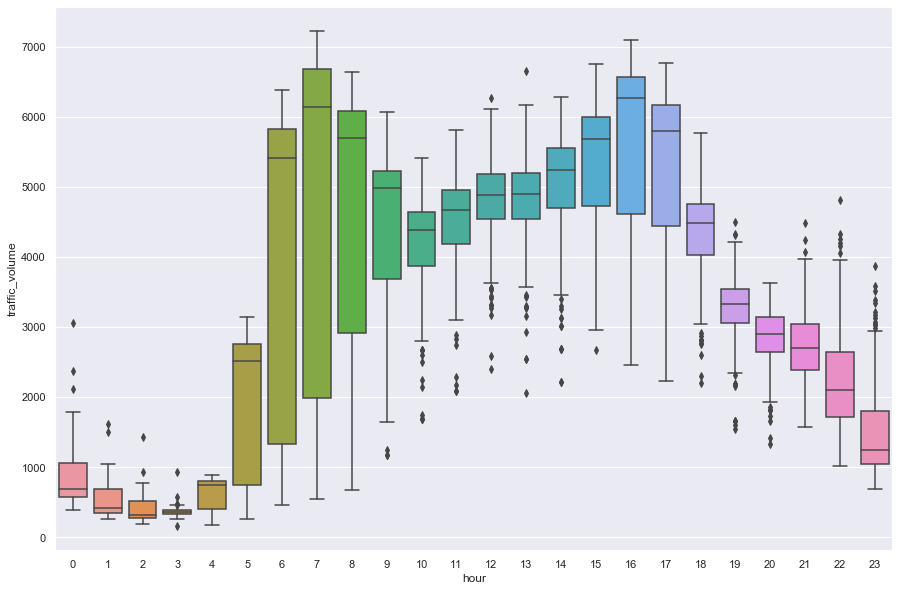

In [22]:
df['hour'] = df.index.hour
fig = plt.figure(figsize = (15,10))
sns.boxplot(data=df, x='hour', y='traffic_volume')

#traffic volume throughout a day seems periodic 
# follow a sinusoidal trend
# it is also align with literature that traffic volume peaks in two time periods of a day

# Insights:
Traffic volume seems to follow a certain cycle in a day as the same pattern can be observed across the month in the monthly graph of the traffic volume 
A pattern can also be seen in the boxplot above
This suggests we may be able to predict the traffic volume using data from the previous days.